In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 넓이와 길이에따라 품종이 달라져

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
X= data.drop("species", axis=1)
y = data['species']

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [9]:
y= pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=10)

# Sequential

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-09-09 17:32:56.258744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 17:32:58.001378: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-09 17:32:58.001508: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-09 17:32:58.005897: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-09 17:32:58.368488: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [13]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


2024-09-09 17:32:58.672953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 17:32:58.674318: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-09 17:32:58.749569: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:32:58.749613: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-09 17:32:58.749633: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test,y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 1.1228 - accuracy: 0.3400

2024-09-09 17:32:59.226860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:32:59.287650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:32:59.287729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 131ms/step - loss: 1.1271 - accuracy: 0.3048 - val_loss: 1.1092 - val_accuracy: 0.3778
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 1.1223 - accuracy: 0.3143 - val_loss: 1.1053 - val_accuracy: 0.3778
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 1.1181 - accuracy: 0.3048 - val_loss: 1.1018 - val_accuracy: 0.4000
Epoch 4/100


2024-09-09 17:32:59.545016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:32:59.574762: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:32:59.574881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 30ms/step - loss: 1.1150 - accuracy: 0.3143 - val_loss: 1.0986 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 1.1118 - accuracy: 0.3238 - val_loss: 1.0958 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 1.1094 - accuracy: 0.3429 - val_loss: 1.0931 - val_accuracy: 0.4444
Epoch 7/100
3/3 [==============================] - 0s 38ms/step - loss: 1.1069 - accuracy: 0.3714 - val_loss: 1.0909 - val_accuracy: 0.5333
Epoch 8/100
3/3 [==============================] - 0s 27ms/step - loss: 1.1047 - accuracy: 0.4286 - val_loss: 1.0891 - val_accuracy: 0.6000
Epoch 9/100
3/3 [==============================] - 0s 27ms/step - loss: 1.1028 - accuracy: 0.4667 - val_loss: 1.0877 - val_accuracy: 0.6444
Epoch 10/100
3/3 [==============================] - 0s 28ms/step - loss: 1.1012 - accuracy: 0.5524 - val_loss: 1.0868 - val_accuracy: 0.6444
Epoch 11/100
3/3 [=============

3/3 [==============================] - 0s 22ms/step - loss: 1.0683 - accuracy: 0.6286 - val_loss: 1.0490 - val_accuracy: 0.6667
Epoch 63/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0674 - accuracy: 0.6286 - val_loss: 1.0482 - val_accuracy: 0.6667
Epoch 64/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0664 - accuracy: 0.6476 - val_loss: 1.0474 - val_accuracy: 0.6667
Epoch 65/100
3/3 [==============================] - 0s 22ms/step - loss: 1.0655 - accuracy: 0.6476 - val_loss: 1.0467 - val_accuracy: 0.6667
Epoch 66/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0647 - accuracy: 0.6571 - val_loss: 1.0461 - val_accuracy: 0.6667
Epoch 67/100
3/3 [==============================] - 0s 22ms/step - loss: 1.0637 - accuracy: 0.6571 - val_loss: 1.0458 - val_accuracy: 0.6667
Epoch 68/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0629 - accuracy: 0.6571 - val_loss: 1.0451 - val_accuracy: 0.6667
Epoch 69/100
3/3 [========

2024-09-09 17:33:06.261198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:33:06.285328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:33:06.285402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 17:33:06.290288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:33:06.290350: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

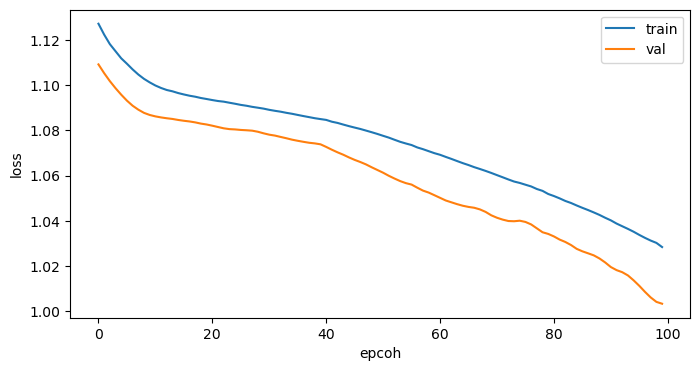

In [15]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epcoh')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 함수형

In [16]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [17]:
inputs = Input(shape=(X_train.shape[1],)) #입력층 정의 Input(shpae=(독립변수 수,))
x = Dense(32, activation='relu')(inputs) #은닉층 1번
x = Dense(64, activation='relu')(x) #은닉층 2번
x = Dense(32, activation='relu')(x) #은닉층 3번
x = Dense(16, activation='relu')(x) #은닉층 4번
x = Dense(3, activation='softmax')(x) #출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 4,931
Trainable params: 4,931
Non-trainable par

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0 )
print(classification_report(y_test, pred))

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 1.0880 - accuracy: 0.2800

2024-09-09 17:33:06.957125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:33:07.010690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:33:07.010749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 95ms/step - loss: 1.0679 - accuracy: 0.3429 - val_loss: 1.0524 - val_accuracy: 0.3111
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 1.0421 - accuracy: 0.3429 - val_loss: 1.0313 - val_accuracy: 0.3111
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 1.0185 - accuracy: 0.3429 - val_loss: 1.0115 - val_accuracy: 0.3111
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.9750 - accuracy: 0.4200

2024-09-09 17:33:07.182238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:33:07.211108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:33:07.211183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 28ms/step - loss: 0.9969 - accuracy: 0.3429 - val_loss: 0.9936 - val_accuracy: 0.3111
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.9764 - accuracy: 0.3429 - val_loss: 0.9771 - val_accuracy: 0.3111
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.9579 - accuracy: 0.3619 - val_loss: 0.9627 - val_accuracy: 0.4889
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9424 - accuracy: 0.5619 - val_loss: 0.9497 - val_accuracy: 0.5778
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 0.9267 - accuracy: 0.6762 - val_loss: 0.9359 - val_accuracy: 0.6000
Epoch 9/100
3/3 [==============================] - 0s 26ms/step - loss: 0.9097 - accuracy: 0.6857 - val_loss: 0.9206 - val_accuracy: 0.6000
Epoch 10/100
3/3 [==============================] - 0s 28ms/step - loss: 0.8898 - accuracy: 0.6857 - val_loss: 0.9041 - val_accuracy: 0.6000
Epoch 11/100
3/3 [=============

3/3 [==============================] - 0s 26ms/step - loss: 0.2080 - accuracy: 0.9429 - val_loss: 0.2056 - val_accuracy: 0.9111
Epoch 63/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1832 - accuracy: 0.9714 - val_loss: 0.2598 - val_accuracy: 0.8889
Epoch 64/100
3/3 [==============================] - 0s 26ms/step - loss: 0.2088 - accuracy: 0.9238 - val_loss: 0.2842 - val_accuracy: 0.8889
Epoch 65/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1992 - accuracy: 0.9238 - val_loss: 0.2007 - val_accuracy: 0.9333
Epoch 66/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1817 - accuracy: 0.9524 - val_loss: 0.2001 - val_accuracy: 0.9111
Epoch 67/100
3/3 [==============================] - 0s 24ms/step - loss: 0.2257 - accuracy: 0.9048 - val_loss: 0.1828 - val_accuracy: 0.9111
Epoch 68/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1836 - accuracy: 0.9524 - val_loss: 0.2088 - val_accuracy: 0.9333
Epoch 69/100
3/3 [========

2024-09-09 17:33:14.172550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


NameError: name 'classification_report' is not defined

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 클래스형

In [ ]:
class Iris(tf.keras.Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.classifier = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.classifier(x)

In [ ]:
model = Iris()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test,y_test))
pred=model.predict(X_test)
pred=pd.DataFrame(pred)
pred=pred[0].apply(lambda x: 1 if x > 5 else 0)
print(classification_report(y_test, pred))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
class Iris(Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = Dense(16,activation='relu')
        self.dense2 = Dense(8,activation='relu')
        self.classifier = Dense(3,activation='softmax')
    def call(inputs, self):
        x= self.dense1(inputs)
        x= self.dense2(x)
        return self.classifier(x)

In [ ]:
model =Iris()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=150, validation_data=(X_test, y_test))
